In [2]:
import urllib
import re
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import requests
import json

geoInfRequestBaseurl = 'http://www.mapquestapi.com/geocoding/v1/address'
zooplaBaseurl = 'https://www.zoopla.co.uk/property/uprn/100021555'
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.82 Safari/537.36'}

pattern_price = re.compile(r'"saleEstimate":{"__typename":"SaleEstimate","lowerPrice":(.*?),"currentPrice":(.*?),"upperPrice":(.*?),"');
pattern_address = re.compile(r'"address":{"__typename":"Address","fullAddress":"(.*?)"');

price_lower = []
price_middle = []
price_higher = []
address = []
longitude = []
latitude = []

propertyIDBegin = 48
propertyIDEnd = 96
baseVal = 419-48

for page in range(propertyIDBegin, propertyIDEnd+1, 2):
    # read the url of each page
    # print("read page", page)

    url = zooplaBaseurl + str(page+baseVal) + '/'

    request = urllib.request.Request(url, headers=head)
    response = urllib.request.urlopen(request)
    html = response.read().decode('utf-8')

    soup_str = str(BeautifulSoup(html, 'html.parser'));

    try:
        price_str = pattern_price.findall(soup_str)
        price_middle.append(float(price_str[0][1]))
        price_lower.append(float(price_str[0][0]))
        price_higher.append(float(price_str[0][2]))

    except:
        print('POA')
        price_middle.append(float("nan"))
        price_lower.append(float("nan"))
        price_higher.append(float("nan"))
    
    try:
        address_str = pattern_address.findall(soup_str)
        address.append(address_str[0])

        parameters = {
            "key": "Vlb51W9N9xMii3NZLllYIlgYJIEiG4gX",
            "location": address_str[0]+',London,England'
        }

        response = requests.get(geoInfRequestBaseurl, params=parameters)
        dataJ = json.loads(response.text)['results']
        lat = (dataJ[0]['locations'][0]['latLng']['lat'])
        lng = (dataJ[0]['locations'][0]['latLng']['lng'])

        longitude.append(lng)
        latitude.append(lat)


    except:
        print('Address None')
        address.append('None')
        longitude.append(float("nan"))
        latitude.append(float("nan"))




In [3]:
postCodePattern = re.compile(
    r'\b[A-Z]{1,2}[0-9][A-Z0-9]? [0-9][ABD-HJLNP-UW-Z]{2}\b')
postCode = postCodePattern.findall(address[0])
postCode[0]


'TW4 5BQ'

In [4]:
price_lower[0]

587000.0

In [5]:
roadNamePattern = re.compile(r'\d{1,3} (.*?),')
roadName = roadNamePattern.findall(address[0])
roadName[0]


'Munster Avenue'

In [6]:
raw_data = pd.DataFrame({"Low": price_lower, "Estimated price": price_middle, "High": price_higher,
                        "Address": address, 'House number': range(propertyIDBegin, propertyIDEnd+1, 2), 
                        "Longitude": longitude, "Latitude": latitude})
raw_data.to_csv(postCode[0]+" price data.csv", index=True, header=True)
sio.savemat(postCode[0]+' price data.mat', {"Low": price_lower, "Estimate": price_middle,
            "High": price_higher, "Address": address, "HouseNumber": range(propertyIDBegin, propertyIDEnd+1, 2),
            "Longitude": longitude, "Latitude": latitude})
raw_data


,Low,Estimated price,High,Address,House number,Longitude,Latitude
0,587000.0,652000.0,717000.0,"48 Munster Avenue, Hounslow, TW4 5BQ",48,-0.38136,51.46275
1,461000.0,486000.0,510000.0,"50 Munster Avenue, Hounslow, TW4 5BQ",50,-0.38149,51.46273
2,493000.0,547000.0,602000.0,"52 Munster Avenue, Hounslow, TW4 5BQ",52,-0.38157,51.46270
3,473000.0,526000.0,578000.0,"54 Munster Avenue, Hounslow, TW4 5BQ",54,-0.38169,51.46267
4,509000.0,566000.0,623000.0,"56 Munster Avenue, Hounslow, TW4 5BQ",56,-0.38177,51.46264
5,509000.0,566000.0,623000.0,"58 Munster Avenue, Hounslow, TW4 5BQ",58,-0.38188,51.46261
6,460000.0,575000.0,690000.0,"60 Munster Avenue, Hounslow, TW4 5BQ",60,-0.38196,51.46258
7,499000.0,526000.0,552000.0,"62 Munster Avenue, Hounslow, TW4 5BQ",62,-0.38208,51.46255
8,453000.0,503000.0,553000.0,"64 Munster Avenue, Hounslow, TW4 5BQ",64,-0.38176,51.46391
9,482000.0,536000.0,590000.0,"66 Munster Avenue, Hounslow, TW4 5BQ",66,-0.38228,51.46249


In [7]:
estimateVar = np.var(price_middle)
estimateVar


1299225600.0

Text(0.5, 1.0, 'Prices of properties along Munster Avenue with TW4 5BQ post code')

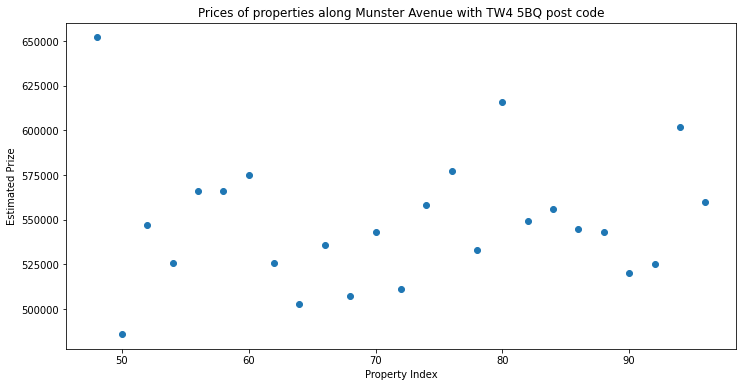

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(range(propertyIDBegin, propertyIDEnd+1, 2), price_middle)
plt.xlabel("Property Index")
plt.ylabel("Estimated Prize")
plt.title("Prices of properties along " +
          roadName[0] + " with " + postCode[0] + " post code")


Text(0.5, 1.0, 'Prices of properties along Munster Avenue with TW4 5BQ post code')

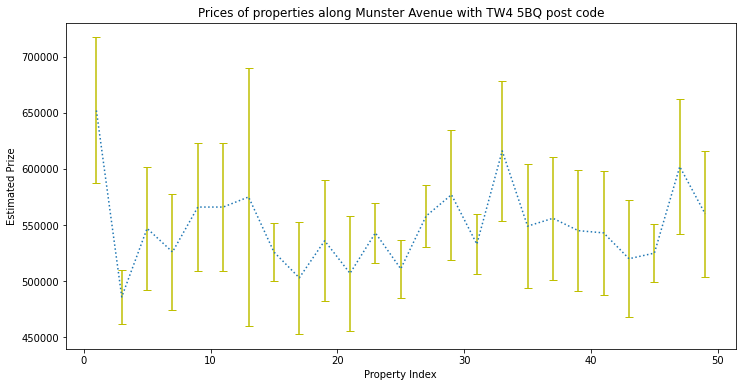

In [9]:
plt.figure(figsize=(12, 6))
yerror = np.array(price_higher)-np.array(price_middle)
plt.errorbar(np.arange(1, len(price_middle)+1)*2-1, price_middle,
             yerr=yerror, ecolor='y', capsize=4, fmt=':')
plt.xlabel("Property Index")
plt.ylabel("Estimated Prize")
plt.title("Prices of properties along " +
          roadName[0] + " with " + postCode[0] + " post code")
# plt.plot(range(1,len(price_middle)+1), price_higher)
# plt.plot(range(1,len(price_middle)+1), price_lower)


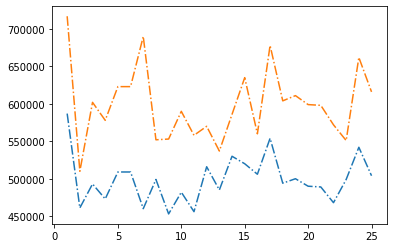

In [10]:
plt.plot(range(1, len(price_middle)+1), price_lower,
         linestyle="dashdot", label="Lower")
plt.plot(range(1, len(price_middle)+1), price_higher,
         linestyle="dashdot", label="Higher")


coefficient of determination: 0.08544765059597992
intercept: 498748.11594202905
coefficients: [631.30434783]


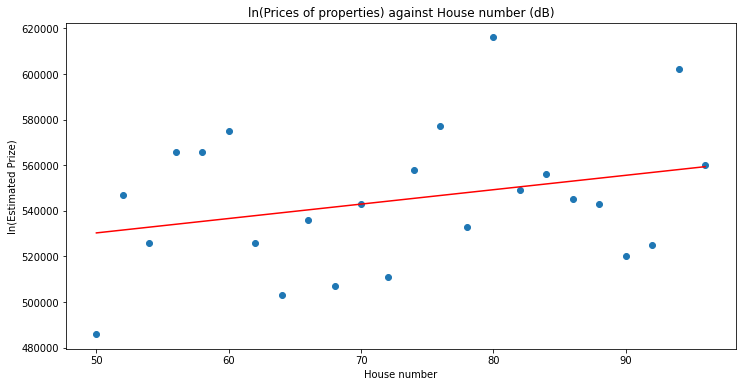

In [11]:
from sklearn.linear_model import LinearRegression

def my_IQR(raw_data, propertyName):
    Q1 = raw_data[propertyName].quantile(0.25)
    Q3 = raw_data[propertyName].quantile(0.75)
    IQR = Q3 - Q1

    raw_data_m1 = raw_data.copy()

    # use IQR to remove outliers
    raw_data_m1.drop(raw_data_m1[(raw_data_m1[propertyName] < (Q1 - 1.5 * IQR)) \
        | (raw_data_m1[propertyName] > (Q3 + 1.5 * IQR))].index, inplace=True)
    return raw_data_m1

# apply the IQR method to remove outliers
raw_data_m1 = my_IQR(raw_data, "Estimated price")
raw_data_m1 = raw_data_m1.dropna(subset = ["Estimated price"], axis = 0)

X_train = raw_data_m1[["House number"]]
y_train = (raw_data_m1["Estimated price"])
linear_reg_model = LinearRegression().fit(X_train, y_train)

r_sq = linear_reg_model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")      # the best score is 1
print(f"intercept: {linear_reg_model.intercept_}")
print(f"coefficients: {linear_reg_model.coef_}")

plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train)
plt.plot(np.array(X_train), np.array(X_train) * linear_reg_model.coef_ + linear_reg_model.intercept_, 'r')
plt.xlabel("House number");
plt.ylabel("ln(Estimated Prize)");
plt.title("ln(Prices of properties) against House number (dB)");